# Intro

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')


import nltk

In [2]:
#!conda install --yes --prefix {sys.prefix} PACKAGE

In [18]:
#Read data

df = pd.read_csv(r"C:\Users\umagl\OneDrive\Documenti\Learning\Python\sentiment_analysis_amazon\Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [19]:
print(df['Text'].values[0]) #first review
print(df.shape)

df = df.head(500)
print(df.shape)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
(568454, 10)
(500, 10)


### Quick EDA

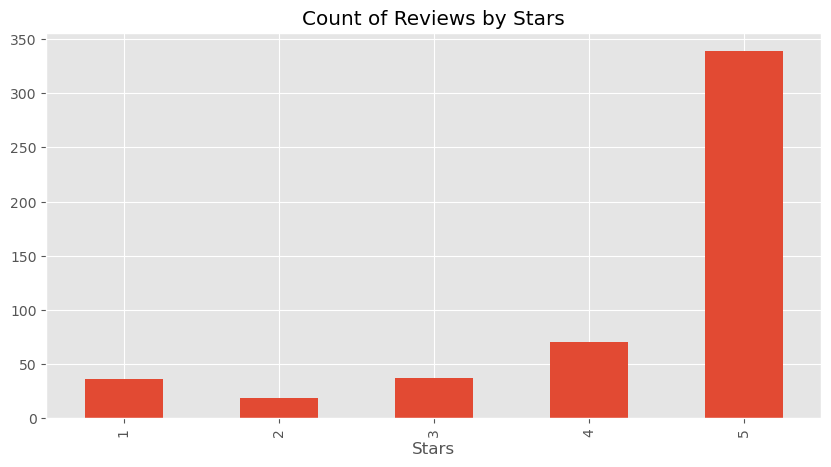

In [20]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar', title= 'Count of Reviews by Stars',
                                            figsize=(10,5))
ax.set_xlabel('Stars')
plt.show()

#biased toward positive reviews, slight uptick descending from 2 to 1

# NLTK (VADER)

In [21]:
example = df['Text'][50]
print(example)

tokens = nltk.word_tokenize(example)
tokens[:10]
#type(tokens) -> list

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [23]:
tagged = nltk.pos_tag(tokens)
tagged[:10]
#part of speech tagging labels words for their grammar

#https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html


[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

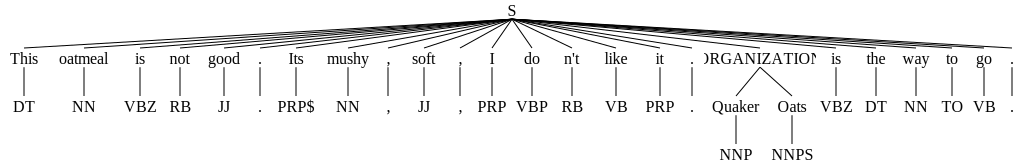

In [24]:
import svgling
nltk.chunk.ne_chunk(tagged)
#groups the tagged tokens in chunks of text
#'Quacker Oats' grouped as ORGANIZATION

# or
# entities=nltk.chunk.ne_chunk
# entities(tagged).pprint

### VADER Sentiment Scoring
BOW approach, removes stop words (and, the, a...), assigns scores to individual words, shows neg/neu/pos sentiment. Doesn't account for relations between words.

In [42]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [43]:
sia.polarity_scores(example)
#sia.polarity_scores('I am so happy')
#sia.polarity_scores('This was the worst thing ever.')

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [44]:
#running the polarity score on the entire dataset

res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)   #res[i] works too
    
res

# tqdm: adds a progress bar, it has low computation time (overhead)
# df.iterrows(): iterates the rows of a df
# for each line: extract id -> create a new key (indexed by id) containing the sentiment

  0%|          | 0/500 [00:00<?, ?it/s]

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [55]:
pd.DataFrame(res)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,...,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500
neg,0.0000,0.1380,0.0910,0.0,0.0000,0.029,0.0340,0.0000,0.0000,0.0000,0.0170,0.1130,0.031,0.0000,0.1040,0.0000,0.0970,0.0000,0.0120,0.0000,0.0000,0.0000,0.0000,0.0850,0.0380,...,0.0660,0.0340,0.0000,0.2450,0.0000,0.0220,0.0000,0.0000,0.0880,0.0000,0.0000,0.000,0.1790,0.0000,0.0000,0.0550,0.0000,0.0560,0.1000,0.0000,0.0000,0.0590,0.0250,0.041,0.0000
neu,0.6950,0.8620,0.7540,1.0,0.5520,0.809,0.6930,0.5200,0.8510,0.7050,0.8460,0.8870,0.923,0.3550,0.6320,0.8610,0.6940,0.6100,0.8850,0.8630,0.8650,0.7390,0.7680,0.7710,0.8950,...,0.6140,0.7280,0.8230,0.6520,0.4350,0.7280,0.6050,0.8620,0.7670,0.7610,0.8180,0.909,0.7070,0.8610,0.7630,0.7040,0.7170,0.8550,0.6450,0.7880,0.5540,0.7990,0.7620,0.904,0.6780
pos,0.3050,0.0000,0.1550,0.0,0.4480,0.163,0.2730,0.4800,0.1490,0.2950,0.1370,0.0000,0.046,0.6450,0.2640,0.1390,0.2090,0.3900,0.1030,0.1370,0.1350,0.2610,0.2320,0.1430,0.0680,...,0.3200,0.2380,0.1770,0.1030,0.5650,0.2490,0.3950,0.1380,0.1450,0.2390,0.1820,0.091,0.1140,0.1390,0.2370,0.2410,0.2830,0.0890,0.2540,0.2120,0.4460,0.1420,0.2120,0.055,0.3220
compound,0.9441,-0.5664,0.8265,0.0,0.9468,0.883,0.9346,0.9487,0.6369,0.8313,0.9746,-0.7579,0.296,0.9466,0.6486,0.5719,0.7481,0.8883,0.8957,0.6077,0.6249,0.9153,0.7687,0.2617,0.3939,...,0.9684,0.8555,0.6239,-0.3855,0.9935,0.9451,0.9079,0.3384,0.4516,0.8547,0.9224,0.296,-0.3723,0.9598,0.9788,0.9287,0.9367,0.5976,0.6486,0.9743,0.9725,0.7833,0.9848,0.128,0.9811


In [14]:
vader = pd.DataFrame(res).T 
#.T because it's oriented in the other way
vader = vader.reset_index().rename(columns = {'index':'Id'})
#reset_index() adds a column matching the index
vader = vader.merge(df, how= 'left')            # on= 'Id'
#left outer join, preserves the values from the left

vader.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Plotting the results of VADER

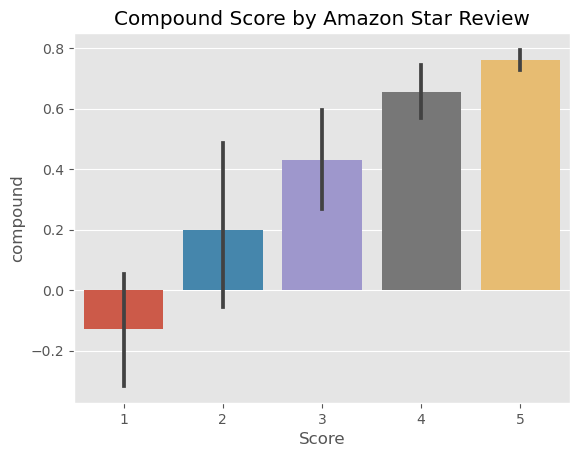

In [15]:
ax = sns.barplot(data = vader, x = 'Score', y ='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

# an increase in stars (score 1-5) is associated to an increase in compound score

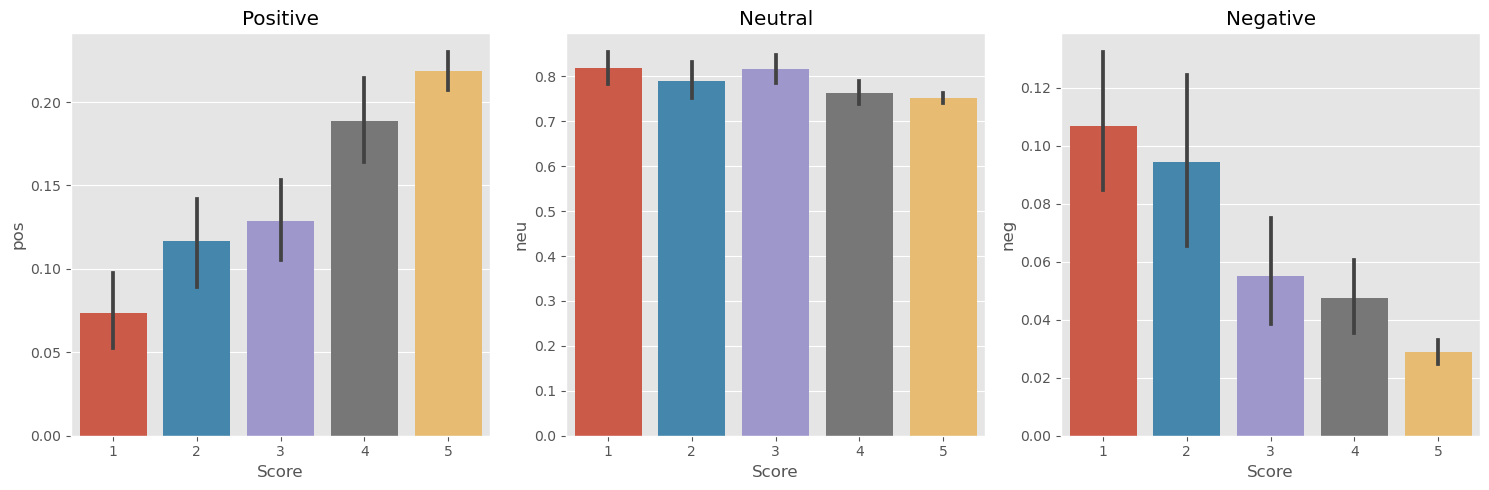

In [23]:
fig, axs = plt.subplots(1, 3, 
                        figsize = (15,5))
# 1x3 grid of results
sns.barplot(data=vader, x='Score', y='pos', ax = axs[0])
sns.barplot(data=vader, x='Score', y='neu', ax = axs[1])
sns.barplot(data=vader, x='Score', y='neg', ax = axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.tight_layout()
#useful to distance the y-labels from the other graphs

#neutral is flat! compound is mainly determined by pos and neg

# Roberta (pretrained from Hugging Face)
Context based, better at catching nuances and sarcasm.

In [56]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [57]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# Transfer learning:
# the model was already trained on twitter comments
# -> we download all the weights

In [58]:
# Roberta results

encoded_text = tokenizer(example, return_tensors = 'pt') #pt from pytorch
#text as 1s and 0s
output = model(**encoded_text)
output #is a tensor (generalization of vector)

scores = output[0][0].detach().numpy()
# tensor -> numpy, so we can store it locally
scores = softmax(scores) # to compare it with vader
# softmax fct: exp(x) / SUM[exp(x)]
scores

# ** operator inside functions:
# unpacks a mapping-like object
# ex. x= {'a'= 1, 'b'= 2} -> f(**x) <=> f(a= 1, b= 2)

array([0.97635514, 0.02068746, 0.00295737], dtype=float32)

In [60]:
scores_dict = {
    'rob_neg' : scores[0],
    'rob_neu' : scores[1],
    'rob_pos' : scores[2]
}
print(scores_dict)

{'rob_neg': 0.97635514, 'rob_neu': 0.020687465, 'rob_pos': 0.0029573692}


In [61]:
# VADER results are less polarized
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [83]:
combined
roberta_res

{'rob_neg': -2.2463932, 'rob_neu': -0.7110828, 'rob_pos': 3.7556005}

In [70]:
def polarity_scores_roberta(sentence):
    encoded_text =  tokenizer(sentence, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores_dict = {
    'rob_neg' : scores[0],
    'rob_neu' : scores[1],
    'rob_pos' : scores[2]
    }
    return scores_dict

res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    try:
        text = row['Text']
        myid = row['Id']

        vader_res = sia.polarity_scores(text)
        #renaming the polarity labels:
        vader_res_rename = {}
        for key, value in vader_res.items():
            vader_res_rename[f"vader_{key}"] = value

        roberta_res = polarity_scores_roberta(text)

        combined = {**vader_res_rename, **roberta_res}

        #break   to print the first results

        res[myid] = combined
    except RuntimeError:
        print(f'Broke for id {myid}')
        #we get an error there's some text that is too long for roberta
res

# roberta is optimized when running on a GPU (slower with CPU)

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


{1: {'vader_neg': 0.0,
  'vader_neu': 0.695,
  'vader_pos': 0.305,
  'vader_compound': 0.9441,
  'rob_neg': -1.9043183,
  'rob_neu': -0.25697222,
  'rob_pos': 2.6776967},
 2: {'vader_neg': 0.138,
  'vader_neu': 0.862,
  'vader_pos': 0.0,
  'vader_compound': -0.5664,
  'rob_neg': 0.8390221,
  'rob_neu': 0.721198,
  'rob_pos': -1.7401375},
 3: {'vader_neg': 0.091,
  'vader_neu': 0.754,
  'vader_pos': 0.155,
  'vader_compound': 0.8265,
  'rob_neg': -2.881925,
  'rob_neu': 0.5315886,
  'rob_pos': 2.7468867},
 4: {'vader_neg': 0.0,
  'vader_neu': 1.0,
  'vader_pos': 0.0,
  'vader_compound': 0.0,
  'rob_neg': -3.0998235,
  'rob_neu': 0.5716304,
  'rob_pos': 2.8800652},
 5: {'vader_neg': 0.0,
  'vader_neu': 0.552,
  'vader_pos': 0.448,
  'vader_compound': 0.9468,
  'rob_neg': -2.4850395,
  'rob_neu': -0.64413214,
  'rob_pos': 3.919231},
 6: {'vader_neg': 0.029,
  'vader_neu': 0.809,
  'vader_pos': 0.163,
  'vader_compound': 0.883,
  'rob_neg': -1.8741887,
  'rob_neu': -0.60559607,
  'rob_pos'

In [84]:
results_df = pd.DataFrame(res).T 
results_df = results_df.reset_index().rename(columns = {'index':'Id'})
results_df = results_df.merge(df, how= 'left')


# Comparing the scores

In [85]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'rob_neg', 'rob_neu', 'rob_pos', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

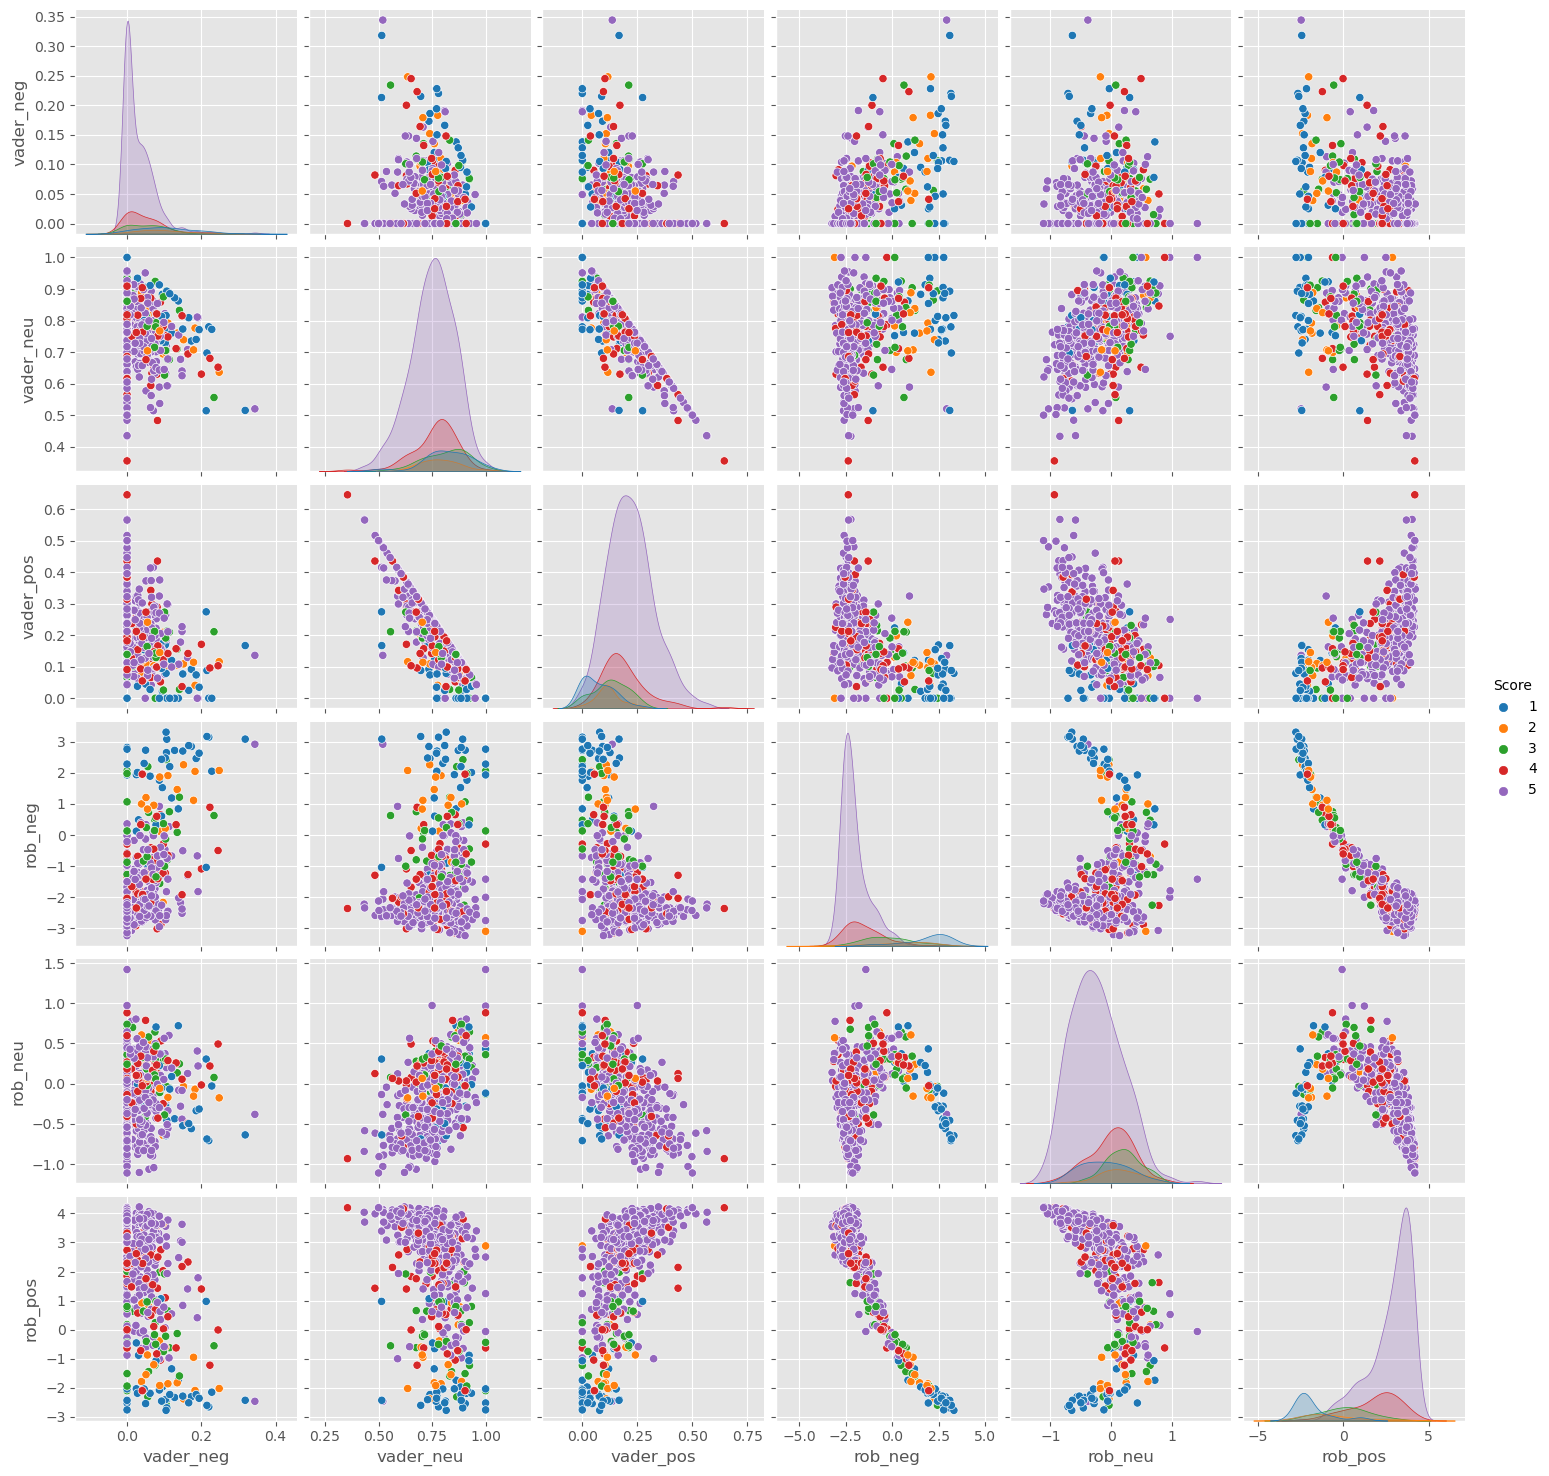

In [50]:
sns.pairplot(data=results_df, 
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                   'rob_neg', 'rob_neu', 'rob_pos'],
             hue = "Score",
             palette = 'tab10')

# Reviewing the results

In [87]:
results_df.query('Score == 1') \
    .sort_values('rob_pos', ascending = False)['Text'].values[0]

# queries the 1 star reviews
# we observe the cases where roberta gave strange high positive scores
# in particular, the highest score is for this review

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [88]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending = False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [89]:
results_df.query('Score == 5') \
    .sort_values('rob_neg', ascending = False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [55]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending = False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

# Transformers Pipeline

In [90]:
from transformers import pipeline

sent_pl = pipeline("sentiment-analysis")
#downloads the default model

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


KeyboardInterrupt: 

In [ ]:
sent_pl('Not bad for the price, it was decent')

# Sklearn classification

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import re

def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

x = df["Text"]
x = x.apply(word_drop)

y = df["Score"]
y.replace({1:'negative',
           2:'negative',
           3:'neutral', 
           4:'positive',
           5:'positive'},
         inplace = True)
y.unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .25)

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
xv_train = vectorizer.fit_transform(x_train)
xv_test = vectorizer.transform(x_test)

### Linear SVM

In [94]:
from sklearn import svm

svm = svm.SVC(kernel = 'linear')
svm.fit(xv_train, y_train)

SVC(kernel='linear')

In [95]:
pred_svm = svm.predict(xv_test)
print(classification_report(y_test, pred_svm))

#print(svm.score(xv_test, y_test))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        10
     neutral       0.00      0.00      0.00        12
    positive       0.82      1.00      0.90       103

    accuracy                           0.82       125
   macro avg       0.27      0.33      0.30       125
weighted avg       0.68      0.82      0.74       125



C:\Users\umagl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\umagl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\umagl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic regression

In [96]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xv_train, y_train)

LogisticRegression()

In [79]:
pred_lr = lr.predict(xv_test)
print(classification_report(y_test, pred_lr))

0.792
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        16
     neutral       0.00      0.00      0.00        10
    positive       0.79      1.00      0.88        99

    accuracy                           0.79       125
   macro avg       0.26      0.33      0.29       125
weighted avg       0.63      0.79      0.70       125



C:\Users\umagl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\umagl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\umagl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(xv_train, y_train)

DecisionTreeClassifier()

In [83]:
pred_dt = dt.predict(xv_test)
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

    negative       0.33      0.19      0.24        16
     neutral       0.22      0.20      0.21        10
    positive       0.81      0.88      0.84        99

    accuracy                           0.74       125
   macro avg       0.46      0.42      0.43       125
weighted avg       0.70      0.74      0.72       125



### Model evaluation

In [88]:
# the score method returns the mean accuracy
print(svm.score(xv_test, y_test))
print(lr.score(xv_test, y_test))
print(dt.score(xv_test, y_test))

0.792
0.792
0.736


In [93]:
# F1 scores
from sklearn.metrics import f1_score
print("SVM: ", f1_score(y_test, svm.predict(xv_test), average = None, labels = ["negative", "neutral", "positive"]))
print("Logistic: ", f1_score(y_test, lr.predict(xv_test), average = None, labels = ["negative", "neutral", "positive"]))
print("Decision Tree: ", f1_score(y_test, dt.predict(xv_test), average = None, labels = ["negative", "neutral", "positive"]))

#average=None  shows us the f1_score for each individual class
#if I switch the labels the ordering will change

#the issue is due to the data, not the models:
y_train.value_counts("positive")

SVM:  [0.         0.         0.88392857]
Decision Tree:  [0.24       0.21052632 0.84466019]
Logistic:  [0.         0.         0.88392857]


positive    0.826667
negative    0.101333
neutral     0.072000
Name: Score, dtype: float64

### Balancing the dataset

In [98]:
df = pd.read_csv(r"C:\Users\umagl\OneDrive\Documenti\Learning\Python\sentiment_analysis_amazon\Reviews.csv")
df = df.head(10000)

In [100]:
df = df.replace({1:'negative',
           2:'negative',
           3:'neutral', 
           4:'positive',
           5:'positive'})

positive = df[df.Score == 'positive']
neutral = df[df.Score == 'neutral']
negative = df[df.Score == 'negative']

positive_shrunk = positive[:len(negative)]

In [105]:
df = pd.concat([positive_shrunk, negative, neutral], ignore_index = True)

df = df.sample(frac = 1) 
# a sample containing 100% of observations (shuffled)
len(df)

3906

In [106]:
x = df["Text"]
x = x.apply(word_drop)

y = df["Score"]
y.replace({1:'negative',
           2:'negative',
           3:'neutral', 
           4:'positive',
           5:'positive'},
         inplace = True)

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .25)

vectorizer = TfidfVectorizer()
xv_train = vectorizer.fit_transform(x_train)
xv_test = vectorizer.transform(x_test)

### Comparing the results

In [160]:
# linear svm
svm.fit(xv_train, y_train)
pred_svm = svm.predict(xv_test)
# log regression
lr.fit(xv_train, y_train)
pred_lr = lr.predict(xv_test)
# decision tree
dt.fit(xv_train, y_train)
pred_dt = dt.predict(xv_test)

# accuracy
print(svm.score(xv_test, y_test))
print(lr.score(xv_test, y_test))
print(dt.score(xv_test, y_test))

# F1
print("SVM: ", f1_score(y_test, svm.predict(xv_test), average = None, labels = ["negative", "neutral", "positive"]))
print("Decision Tree: ", f1_score(y_test, dt.predict(xv_test), average = None, labels = ["negative", "neutral", "positive"]))
print("Logistic: ", f1_score(y_test, lr.predict(xv_test), average = None, labels = ["negative", "neutral", "positive"]))

# previous accuracy:
#  0.792 (svm)
#  0.792 (log)
#  0.736 (dt)

# previous F1:
#  [0.         0.         0.88392857]  (svm)
#  [0.         0.         0.88392857]  (log)
#  [0.24       0.21052632 0.84466019]  (dt)

0.721596724667349
0.7359263050153532
0.5547594677584442
SVM:  [0.72820513 0.52926209 0.81177977]
Decision Tree:  [0.57253886 0.38164251 0.63020833]
Logistic:  [0.7475     0.5369863  0.81622307]


### Parameter tuning with Grid Search

Lets us test and compare different parameters (Kernel and Cvalue in our case)

In [166]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':(1, 2, 4, 8, 16, 32)}
#dictionary of parameters to try out

del svm
from sklearn import svm
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv= 5)
#cv= how many times the data is splitted to cross-validate a parameter

clf.fit(xv_train, y_train)
print(clf.score(xv_test, y_test))

0.7410440122824974


### Saving the model with pickle

In [169]:
import pickle

with open(r'C:\Users\umagl\OneDrive\Documenti\Learning\Python\sentiment_analysis_transformers\sentiment_classifier.pkl', 'wb') as f:
    pickle.dump(clf, f) #takes the tuned SVM, "dumps" the parameters in the .pkl file

In [172]:
#loading the saved model

with open(r'C:\Users\umagl\OneDrive\Documenti\Learning\Python\sklearn\sentiment_classifier.pkl', 'rb') as f:
    loaded_clf = pickle.load(f)
    
print(x_test[0])



i have bought several of the vitality canned dog food products and have found them all to be of good quality  the product looks more like a stew than a processed meat and it smells better  my labrador is finicky and she appreciates this product better than  most 


In [173]:
loaded_clf.predict(xv_test[0])

ValueError: X has 10199 features, but SVC is expecting 8906 features as input.